In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import zipfile
import os
import shutil
import pandas as pd
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
os.listdir('dataset_face_cropped/')

['Andi', 'David Nababan', 'gema', 'Insan', 'Jona Meivan', 'putra', 'Restu']

In [ ]:
data = {}
directories = ['Andi', 'David Nababan', 'gema', 'Insan', 'Jona Meivan', 'putra', 'Restu']

for directory in directories:
    path = f'dataset_face_cropped/{directory}'
    data[f'{directory.capitalize()} Images'] = len(os.listdir(path))

df = pd.DataFrame(data, index=['Total'])
print(df)

       Andi Images  David nababan Images  Gema Images  Insan Images  \
Total          208                   224          100           400   

       Jona meivan Images  Putra Images  Restu Images  
Total                 134           109           164  


In [ ]:
#define path
base_dir = 'dataset_face_cropped/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
Jona_dir = os.path.join(base_dir, 'Jona meivan')
Andi_dir = os.path.join(base_dir,'Andi')
David_dir = os.path.join(base_dir, 'David Nababan')
Gema_dir = os.path.join(base_dir, 'Gema')
Putra_dir = os.path.join(base_dir, 'putra')
Restu_dir = os.path.join(base_dir, 'Restu')
Insan_dir = os.path.join(base_dir, 'Insan')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
Andi_train = os.path.join(train_dir,'Andi')
David_train = os.path.join(train_dir, 'David Nababan')
Gema_train = os.path.join(train_dir, 'Gema')
Putra_train = os.path.join(train_dir, 'putra')
Restu_train = os.path.join(train_dir, 'Restu')
Jona_train = os.path.join(train_dir, 'Jona meivan')
Insan_train = os.path.join(train_dir, 'Insan')

In [ ]:
Andi_validation = os.path.join(validation_dir,'Andi')
David_validation = os.path.join(validation_dir, 'David Nababan')
Gema_validation = os.path.join(validation_dir, 'Gema')
Putra_validation = os.path.join(validation_dir, 'putra')
Restu_validation = os.path.join(validation_dir, 'Restu')
Jona_validation = os.path.join(validation_dir, 'Jona meivan')
Insan_validation = os.path.join(validation_dir,'Insan')

In [ ]:
os.mkdir(Jona_train)
os.mkdir(Jona_validation)
os.mkdir(Andi_train)
os.mkdir(David_train)
os.mkdir(Gema_train)
os.mkdir(Putra_train)
os.mkdir(Restu_train)
os.mkdir(Andi_validation)
os.mkdir(David_validation)
os.mkdir(Gema_validation)
os.mkdir(Putra_validation)
os.mkdir(Restu_validation)
os.mkdir(Insan_train)
os.mkdir(Insan_validation)

In [ ]:
train_Andi_dir, val_Andi_dir = train_test_split(os.listdir(Andi_dir), test_size=0.2)
train_David_dir, val_David_dir = train_test_split(os.listdir(David_dir), test_size=0.2)
train_Gema_dir, val_Gema_dir = train_test_split(os.listdir(Gema_dir), test_size=0.2)
train_Putra_dir, val_Putra_dir = train_test_split(os.listdir(Putra_dir), test_size=0.2)
train_Jona_dir, val_Jona_dir = train_test_split(os.listdir(Jona_dir), test_size=0.2)
train_Restu_dir, val_Restu_dir = train_test_split(os.listdir(Restu_dir), test_size=0.2)
train_Insan_dir, val_Insan_dir = train_test_split(os.listdir(Insan_dir), test_size=0.2)

In [ ]:
for i in train_Andi_dir:
  shutil.copy(os.path.join(Andi_dir, i), os.path.join(Andi_train, i))
for j in train_David_dir:
  shutil.copy(os.path.join(David_dir, j), os.path.join(David_train, j))
for k in train_Gema_dir:
  shutil.copy(os.path.join(Gema_dir, k), os.path.join(Gema_train, k))
for l in train_Jona_dir:
  shutil.copy(os.path.join(Jona_dir, l), os.path.join(Jona_train, l))
for m in train_Restu_dir:
  shutil.copy(os.path.join(Restu_dir, m), os.path.join(Restu_train, m))
for n in train_Putra_dir:
  shutil.copy(os.path.join(Putra_dir, n), os.path.join(Putra_train, n))
for o in train_Insan_dir:
  shutil.copy(os.path.join(Insan_dir, o), os.path.join(Insan_train, o))

for i in val_Andi_dir:
  shutil.copy(os.path.join(Andi_dir, i), os.path.join(Andi_validation, i))
for j in val_David_dir:
  shutil.copy(os.path.join(David_dir, j), os.path.join(David_validation, j))
for k in val_Gema_dir:
  shutil.copy(os.path.join(Gema_dir, k), os.path.join(Gema_validation, k))
for l in val_Jona_dir:
  shutil.copy(os.path.join(Jona_dir, l), os.path.join(Jona_validation, l))
for m in val_Restu_dir:
  shutil.copy(os.path.join(Restu_dir, m), os.path.join(Restu_validation, m))
for n in val_Putra_dir:
  shutil.copy(os.path.join(Putra_dir, n), os.path.join(Putra_validation, n))
for o in val_Insan_dir:
  shutil.copy(os.path.join(Insan_dir, o), os.path.join(Insan_validation, o))

In [ ]:
#image preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255)


#making generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1218 images belonging to 7 classes.
Found 269 images belonging to 7 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])

In [ ]:
#making callbacks
checkpoint = ModelCheckpoint(
    'model.h5',
    monitor='val_accuracy',
    save_best_only=False,
    verbose=1)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1)

class auto_accuracy_stop(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') > 0.97:
            print('\nAccuracy has greater than 97%. Training Stopped')
            self.model.stop_training = True

auto_stop = auto_accuracy_stop()

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = len(validation_generator),
    verbose = 1,
    callbacks=[checkpoint, early_stopping, auto_stop]
)

Epoch 1/50
39/39 [==============================] - ETA: 0s - loss: 2.1343 - accuracy: 0.2381
Epoch 1: saving model to model.h5
39/39 [==============================] - 14s 338ms/step - loss: 2.1343 - accuracy: 0.2381 - val_loss: 1.8356 - val_accuracy: 0.4052
Epoch 2/50
39/39 [==============================] - ETA: 0s - loss: 1.8681 - accuracy: 0.3186
Epoch 2: saving model to model.h5
39/39 [==============================] - 7s 179ms/step - loss: 1.8681 - accuracy: 0.3186 - val_loss: 1.7933 - val_accuracy: 0.4238
Epoch 3/50
39/39 [==============================] - ETA: 0s - loss: 1.8996 - accuracy: 0.2644
Epoch 3: saving model to model.h5
39/39 [==============================] - 7s 173ms/step - loss: 1.8996 - accuracy: 0.2644 - val_loss: 1.8317 - val_accuracy: 0.2974
Epoch 4/50
39/39 [==============================] - ETA: 0s - loss: 1.8633 - accuracy: 0.2635
Epoch 4: saving model to model.h5
39/39 [==============================] - 7s 178ms/step - loss: 1.8633 - accuracy: 0.2635 - val

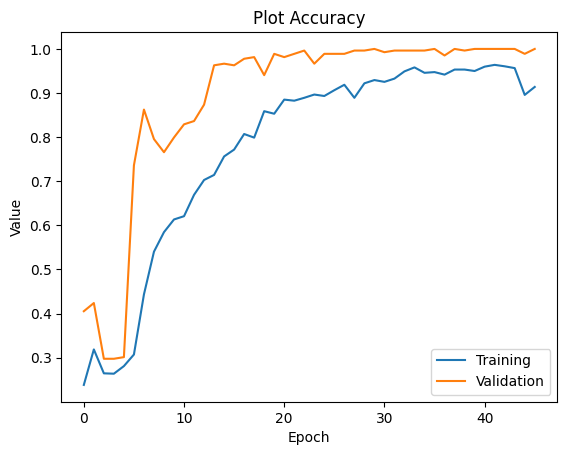

In [ ]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Plot Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

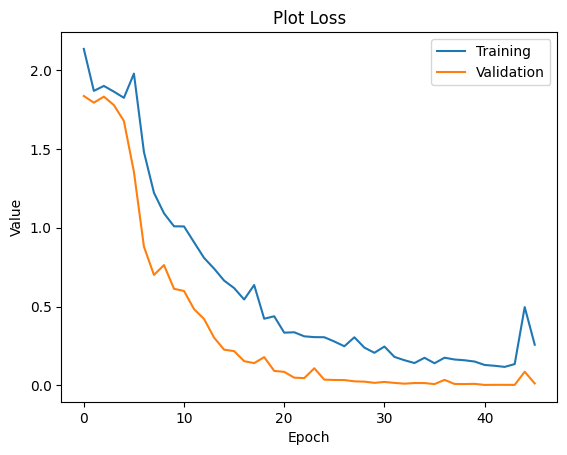

In [ ]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Plot Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpqcefxsj3\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpqcefxsj3\assets
